<a href="https://colab.research.google.com/github/yuta-kanematsu/TU_math_study/blob/main/Chap07_Cm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

# 小数第３位まで表示
%precision 3

'%.3f'

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


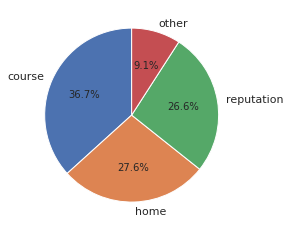

In [ ]:
#Ex07-01
student_data_math = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ds_samplefiles/student-mat.csv', sep=';')
sizes = student_data_math['reason'].value_counts()
labels = student_data_math['reason'].value_counts().index

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.show()

Text(0, 0.5, 'G3 grade avg')

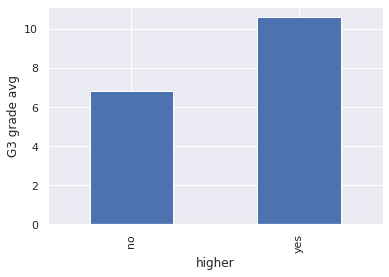

In [ ]:
#EX07-02
student_data_math.groupby('higher')['G3'].mean().plot(kind='bar')
plt.xlabel('higher')
plt.ylabel('G3 grade avg')

Text(0.5, 0, 'G3 Grade avg')

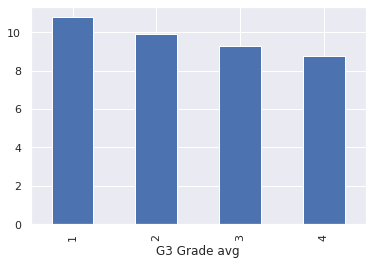

In [ ]:
#Ex07-04
student_data_math.groupby('traveltime')['G3'].mean().plot(kind='bar')
plt.xlabel('G3 Grade avg')

In [ ]:
#Cm007-01-01
import requests, zipfile
from io import StringIO
import io

zip_file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip'
r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))

z.extractall()

dow_jones_index = pd.read_csv('dow_jones_index.data',sep=',')
dow_jones_index.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [ ]:
dow_jones_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    object 
 4   high                                750 non-null    object 
 5   low                                 750 non-null    object 
 6   close                               750 non-null    object 
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     750 non-n

In [ ]:
#Cm07-01-02
dow_jones_index.date = pd.to_datetime(dow_jones_index.date)

delete_dolchar = lambda x: str(x).replace('$', '')

dow_jones_index.open = pd.to_numeric(dow_jones_index.open.map(delete_dolchar))
dow_jones_index.high = pd.to_numeric(dow_jones_index.high.map(delete_dolchar))
dow_jones_index.low = pd.to_numeric(dow_jones_index.low.map(delete_dolchar))
dow_jones_index.close = pd.to_numeric(dow_jones_index.close.map(delete_dolchar))
dow_jones_index.next_weeks_open = pd.to_numeric(dow_jones_index.next_weeks_open.map(delete_dolchar))
dow_jones_index.next_weeks_close = pd.to_numeric(dow_jones_index.next_weeks_close.map(delete_dolchar))
dow_jones_index.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


In [ ]:
#Cm07-01-03
dow_jones_index_stock_index = dow_jones_index.set_index(['date','stock'])

dow_jones_index_stock_index_unstack = dow_jones_index_stock_index.unstack()

dow_close_data = dow_jones_index_stock_index_unstack['close']

dow_close_data.describe()

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,16.504400,46.712400,73.448000,13.051600,103.152000,17.899200,101.175600,52.873600,41.249600,19.784000,...,34.360400,25.920800,19.821600,64.002000,29.626800,59.160000,84.033200,36.46960,53.912800,82.111600
std,0.772922,2.396248,3.087631,1.417382,6.218651,1.984095,5.267066,2.367048,1.882473,0.912022,...,1.666357,1.416407,0.915085,1.828795,1.369257,2.649218,2.985547,0.93282,1.555639,3.137743
min,14.720000,43.530000,69.100000,10.520000,92.750000,14.930000,91.190000,48.350000,37.580000,17.970000,...,31.910000,23.700000,18.150000,60.600000,27.490000,53.330000,79.080000,34.95000,51.520000,75.590000
25%,16.030000,44.360000,71.640000,11.930000,99.590000,16.880000,97.900000,50.290000,39.450000,19.250000,...,33.060000,24.800000,19.190000,62.590000,28.430000,57.920000,82.520000,35.84000,52.540000,79.780000
50%,16.520000,46.250000,72.690000,13.370000,103.540000,17.520000,102.100000,52.910000,41.520000,19.950000,...,34.040000,25.680000,20.110000,64.300000,30.340000,59.210000,83.520000,36.31000,53.660000,82.630000
75%,17.100000,48.500000,74.840000,14.250000,107.210000,18.700000,103.750000,54.630000,42.950000,20.360000,...,35.820000,27.060000,20.530000,65.270000,30.710000,61.180000,85.320000,37.26000,55.290000,84.500000
max,17.920000,51.190000,79.780000,15.250000,115.410000,22.050000,109.660000,56.790000,43.560000,21.440000,...,37.350000,28.600000,20.970000,67.360000,31.410000,63.430000,89.580000,38.47000,56.700000,87.980000


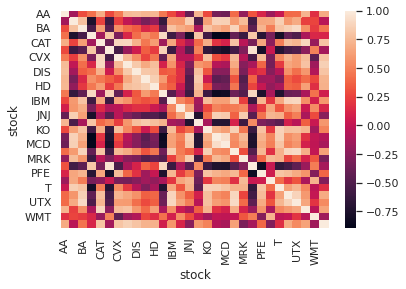

In [ ]:
#Cm07-01-04
corr_data = dow_close_data.corr()
corr_data
sns.heatmap(corr_data)

AA DIS 0.7724697655620214
AXP KRFT 0.8735103611554017
BA UTX 0.9163379610743169
BAC HPQ 0.9058167680009366
CAT DD 0.9028558103078965
CSCO MSFT 0.9537216645891365
CVX CAT 0.8894156562923724
DD CAT 0.9028558103078965
DIS DD 0.8269258130241477
GE HD 0.8582069310150242
HD GE 0.8582069310150242
HPQ BAC 0.9058167680009366
IBM UTX 0.8975523835362522
INTC BA 0.6910939563692001
JNJ KRFT 0.8612879882611021
JPM GE 0.830450859436039
KO T 0.868995241583572
KRFT MCD 0.9299213037922904
MCD KRFT 0.9299213037922904
MMM UTX 0.9136955626526879
MRK JNJ 0.8440270438854454
MSFT CSCO 0.9537216645891365
PFE T 0.806543944675414
PG MRK 0.7497131367292437
T KO 0.868995241583572
TRV MMM 0.8917262016156643
UTX BA 0.9163379610743169
VZ CAT 0.8903147891825165
WMT PG 0.7237055485083286
XOM DD 0.8635107559399798
[Max Corr]: 0.9537216645891365
[stock_1]: CSCO
[stock_2]: MSFT


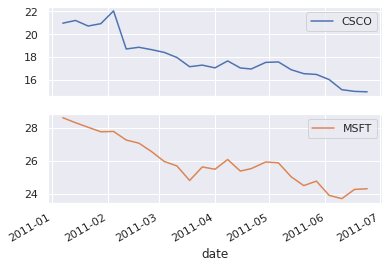

In [ ]:
#Cm07-01-05
max_corr = 0
stock_1 = ''
stock_2 = ''

for i in range(0,len(corr_data)):
    print(
        corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].idxmax()[1],
        corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].idxmax()[0],
        corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]][0]
    )
    if max_corr < corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]][0]:
        max_corr = corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]][0]
        stock_1 = corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].idxmax()[1]
        stock_2 = corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].idxmax()[0]

print('[Max Corr]:',max_corr)
print('[stock_1]:',stock_1)
print('[stock_2]:',stock_2)

dow_close_data_subsets =dow_close_data[[stock_1,stock_2]]
dow_close_data_subsets.plot(subplots=True,grid=True)
plt.grid(True)

In [ ]:
#Cm07-01-06
dow_close_data.rolling(center=False,window=5).mean().head(10)

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2011-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-04,16.290,44.858,70.348,14.328,95.152,21.176,93.656,50.146,39.608,19.550,...,34.288,28.088,18.498,64.750,28.214,55.236,80.462,35.656,55.470,78.936
2011-02-11,16.480,45.336,70.900,14.432,97.114,20.722,94.708,51.110,40.400,20.130,...,33.432,27.818,18.596,64.796,28.138,56.368,81.686,35.748,55.792,80.382
2011-02-18,16.742,45.192,71.494,14.332,99.484,20.250,95.886,52.346,41.254,20.654,...,33.156,27.570,18.766,64.550,28.166,57.626,82.872,35.980,55.906,81.714
2011-02-25,16.920,44.698,71.618,14.322,101.334,19.834,97.550,53.490,41.896,20.870,...,32.814,27.276,18.866,63.936,28.126,58.546,83.506,36.184,55.110,82.986
2011-03-04,17.010,44.670,72.132,14.426,102.806,19.328,99.626,54.206,42.836,20.904,...,32.812,26.916,19.168,63.502,28.212,59.220,83.792,36.274,54.184,84.204


max volatility: CSCO
min volatility: KO


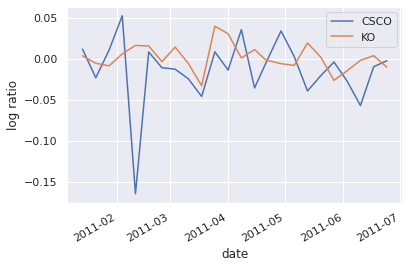

In [ ]:
#Cm07-01-07
log_ratio_stock_close = np.log(dow_close_data/dow_close_data.shift(1))

max_vol_stock = log_ratio_stock_close.std().idxmax()
min_vol_stock = log_ratio_stock_close.std().idxmin()

print('max volatility:',max_vol_stock)
print('min volatility:',min_vol_stock)

log_ratio_stock_close[max_vol_stock].plot()
log_ratio_stock_close[min_vol_stock].plot()
plt.ylabel('log ratio')
plt.legend()
plt.grid(True)

In [ ]:
#Cm07-02-01
file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
online_retail_data = pd.ExcelFile(file_url)

online_retail_data_table = online_retail_data.parse('Online Retail')
online_retail_data_table.head()
online_retail_data_table.info()

online_retail_data_table['cancel_flg'] = online_retail_data_table.InvoiceNo.map(lambda x:str(x)[0])
online_retail_data_table.groupby('cancel_flg').size()
online_retail_data_table = online_retail_data_table[(online_retail_data_table.cancel_flg == '5') & (online_retail_data_table.CustomerID.notnull())]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
#Cm07-02-02
# unique ID
print('購買者数（ユニーク）:',len(online_retail_data_table.CustomerID.unique()))

# unique StockCode
print('商品コード数:',len(online_retail_data_table.StockCode.unique()))

# unique description
# 上より多いから、同じstockcodeで違う名前になった商品がある。
print('商品名の種類数:',len(online_retail_data_table.Description.unique()))

# unique bascket
print('バスケット数:',len(online_retail_data_table.InvoiceNo.unique()))

購買者数（ユニーク）: 4339
商品コード数: 3665
商品名の種類数: 3877
バスケット数: 18536


In [ ]:
#Cm07-02-03
# 売り上げ合計を求めるため、新しいカラムの追加（売り上げ＝数量×単価）
online_retail_data_table['TotalPrice'] = online_retail_data_table.Quantity * online_retail_data_table.UnitPrice

#　それぞれの国ごとに売り上げ合計金額を算出
country_data_total_p = online_retail_data_table.groupby('Country')['TotalPrice'].sum()

# 値に対して、降順にソートして、TOP5を抜き出す。
top_five_country =country_data_total_p.sort_values(ascending=False)[0:5]

# TOP5の国
print(top_five_country)

# TOP5の国のリスト
print('TOP5の国のリスト:',top_five_country.index)

Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Name: TotalPrice, dtype: float64
TOP5の国のリスト: Index(['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France'], dtype='object', name='Country')


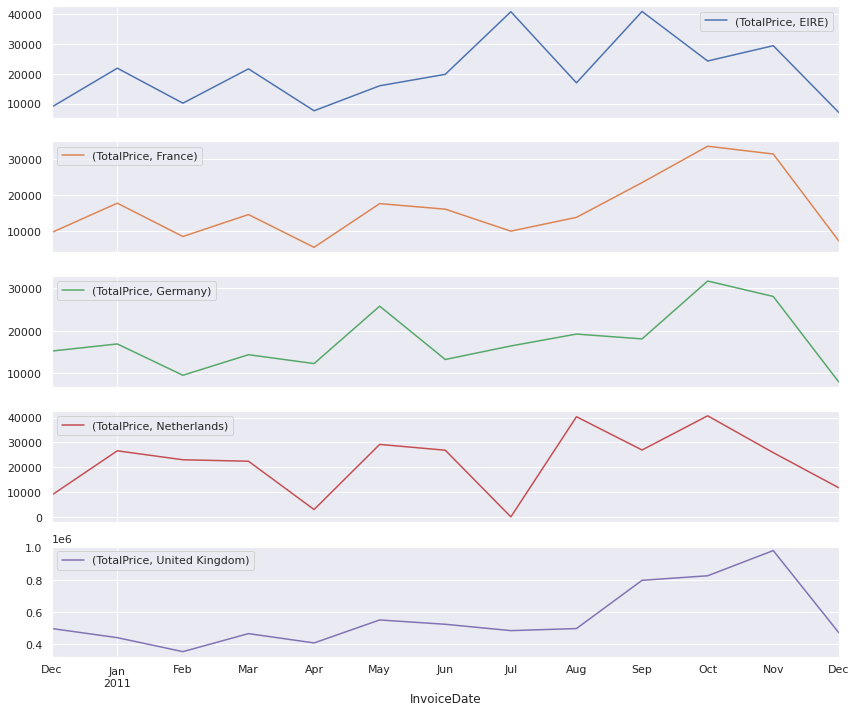

In [ ]:
#Cm07-02-04
# TOP5だけのデータを作成。
top_five_country_data = online_retail_data_table[online_retail_data_table['Country'].isin(top_five_country.index)]

# date と国ごとの売り上げ
top_five_country_data_country_totalP =top_five_country_data.groupby(['InvoiceDate','Country'],as_index=False)['TotalPrice'].sum()
# indexの設定（日時と国）
top_five_country_data_country_totalP_index=top_five_country_data_country_totalP.set_index(['InvoiceDate','Country'])

# 再構成
top_five_country_data_country_totalP_index_uns = top_five_country_data_country_totalP_index.unstack()

# resampleで時系列のデータを月別や四半期等に変更できる。今回は、月別(M)の合計を算出。そのあと、グラフ化
top_five_country_data_country_totalP_index_uns.resample('M').sum().plot(subplots=True,figsize=(12,10))

# グラフが被らないように
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


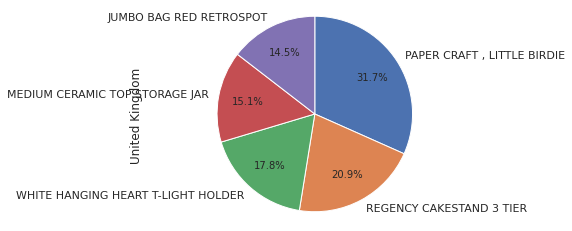

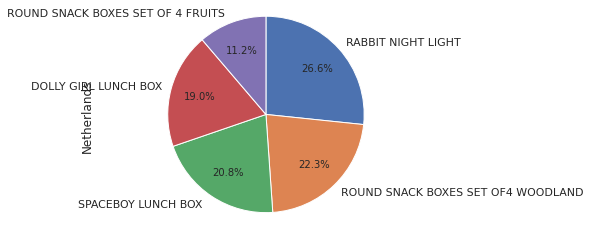

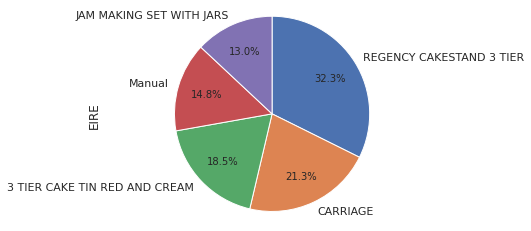

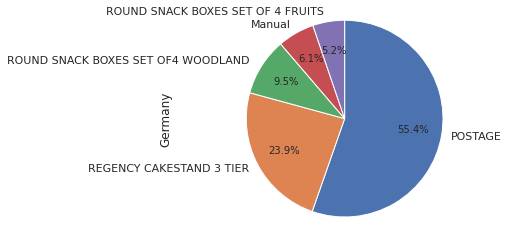

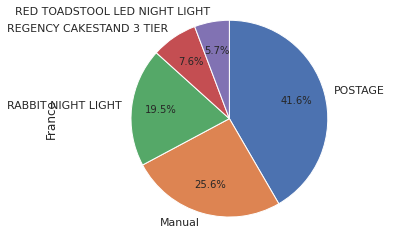

In [ ]:
#Cm07-02-05
for x in top_five_country.index:
    #print('Country:',x)
    country = online_retail_data_table[online_retail_data_table['Country'] == x]
    country_stock_data = country.groupby('Description')['TotalPrice'].sum()
    top_five_country_stock_data=pd.DataFrame(country_stock_data.sort_values(ascending=False)[0:5])    
    plt.figure()
    plt.pie(
        top_five_country_stock_data,
        labels=top_five_country_stock_data.index,
        counterclock=False,
        startangle=90,
        autopct='%.1f%%',
        pctdistance=0.7
    )
    plt.ylabel(x)
    plt.axis('equal')
    #print(top_five_country_stock_data)

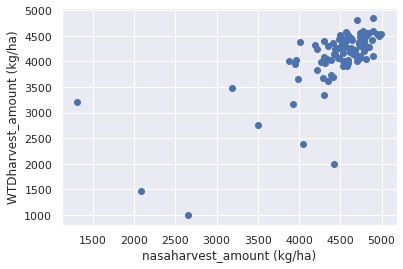

In [12]:
#matplotlib
df = pd.read_excel('nasaNANAa.xlsx')
df.head()
plt.scatter(df['nasaharvest_amount (kg/ha)'], df['WTDharvest_amount (kg/ha)'])
plt.xlabel('nasaharvest_amount (kg/ha)')
plt.ylabel('WTDharvest_amount (kg/ha)')
plt.show()

In [8]:
#plotly
import plotly.express as px
fig = px.scatter(df, x='nasaharvest_amount (kg/ha)', y='WTDharvest_amount (kg/ha)', hover_name='transplant_date (yyyy-mm-dd)')
fig.show()